In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import pearsonr
import os,obspy,shutil,glob
from obspy import read
import librosa.display 
from tqdm import tqdm

from utils import data_process, visualize
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
filepath='/home/yaso/EQ_Place/dataset/New/20220210/'
qry = filepath +'*.mseed'
files = glob.glob(qry)
files.sort()

In [17]:
st = read(files[0])

ex, ey, ez = st[0].data, st[1].data, st[2].data

# ex  = [x * (2.5 / 2**15) for x in ex]
# ey= [x * (2.5 / 2**15) for x in ey] 
# ez=[x * (2.5 / 2**15) for x in ez]
ex, ey, ez = (ex - np.mean(ex))/ 9.80665, (ey - np.mean(ey))/ 9.80665, (ez - np.mean(ez))/ 9.80665
data=np.array([ex, ey, ez])

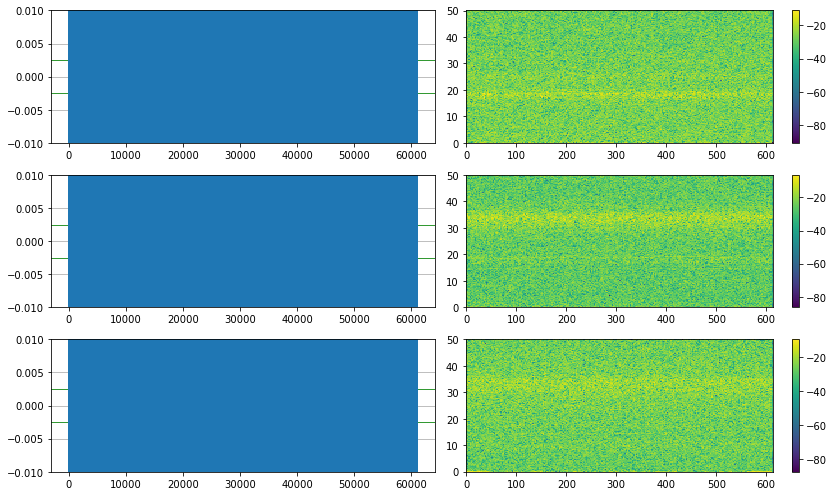

In [18]:
visualize.draw_picture(data, show=True, save_path=None, lim=0.01,save=False)

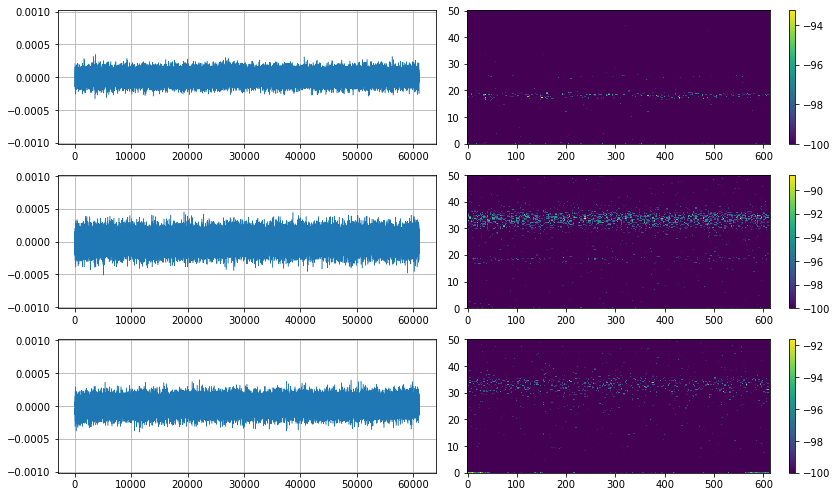

In [15]:
x_lim=np.arange(0,len(data[0]),1)
fs=100
lim=0.01/ 9.80665
fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12, 7))
for i in range(3):

    # axs[i,0].axhline(y=yline, c="green",  linewidth=0.8)
    # axs[i,0].axhline(y=-yline, c="green",  linewidth=0.8)
    axs[i,0].plot(x_lim, data[i], linewidth=0.5)
    axs[i,0].set_ylim((-lim, lim))
    axs[i,0].grid(True)


    f, t, Zxx = signal.stft(data[i], fs,nperseg=512)
    Zxx = librosa.amplitude_to_db(abs(Zxx))
    tt = axs[i,1].pcolormesh(t, f, Zxx, shading='auto')
    fig.colorbar(tt, ax=axs[i,1], )

plt.tight_layout()
plt.show()


In [29]:
# data=[]
date= '20220418'
filepath='/home/yaso/EQ_Place/dataset/New/'+date+'/'
qry = filepath +'*.mseed'
files = glob.glob(qry)
files.sort()
save_path='/home/yaso/EQ_Place/new_figs/'+date+'/'
os.makedirs(save_path, exist_ok=True)
for i in tqdm(range(len(files))):
    st = read(files[i])

    ex, ey, ez = st[0].data, st[1].data, st[2].data

    ex  = [x * (2.5 / 2**15) for x in ex]
    ey= [x * (2.5 / 2**15) for x in ey] 
    ez=[x * (2.5 / 2**15) for x in ez]
    ex, ey, ez = ex - np.mean(ex), ey - np.mean(ey), ez - np.mean(ez)
    data=np.array([ex, ey, ez])
    fn=save_path+files[i][-17:-6]
    visualize.draw_picture(data, show=False, save_path=fn, lim=0.01,save=True)
    

100%|██████████| 9/9 [00:14<00:00,  1.66s/it]


In [13]:
data.shape

(3, 96001)

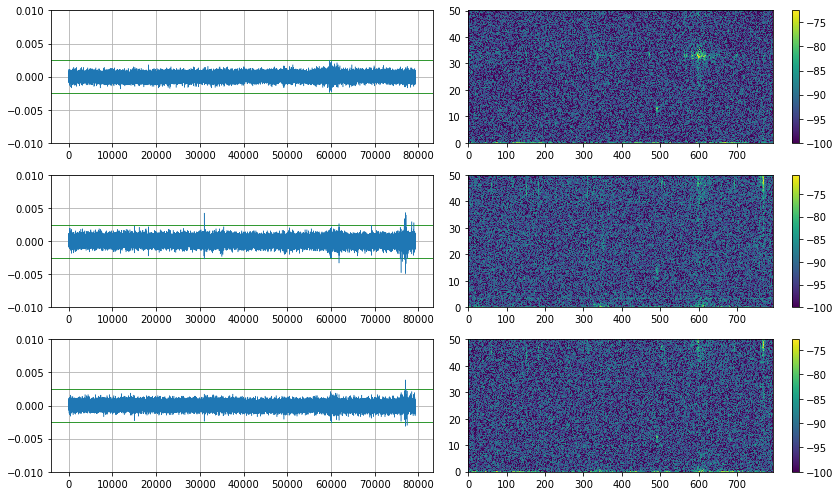

In [30]:
visualize.draw_picture(data, show=True, save_path=fn, lim=0.01,save=False)